In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df= pd.read_csv("/content/mock_kaggle.csv")

In [ ]:
df.head(10)

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
5,2014-01-06,145,4509,1.29
6,2014-01-07,179,4329,1.29
7,2014-01-08,321,4104,1.29
8,2014-01-09,125,4459,1.09
9,2014-01-10,88,5043,1.09


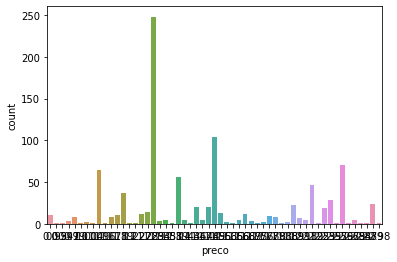

In [ ]:
sns.countplot(data=df,x="preco")

In [ ]:
import datetime
df['Date'] = pd.to_datetime(df['data'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['data']).year
df['month'] = pd.DatetimeIndex(df['data']).month
df['day'] = pd.DatetimeIndex(df['data']).day
df['dayofyear'] = pd.DatetimeIndex(df['data']).dayofyear
df['weekofyear'] = pd.DatetimeIndex(df['data']).weekofyear
df['weekday'] = pd.DatetimeIndex(df['data']).weekday
df['quarter'] = pd.DatetimeIndex(df['data']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['data']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['data']).is_month_end
df['revenue'] = df.apply(lambda row: row.venda + row.preco, axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            937 non-null    object 
 1   venda           937 non-null    int64  
 2   estoque         937 non-null    int64  
 3   preco           937 non-null    float64
 4   Date            937 non-null    object 
 5   year            937 non-null    int64  
 6   month           937 non-null    int64  
 7   day             937 non-null    int64  
 8   dayofyear       937 non-null    int64  
 9   weekofyear      937 non-null    int64  
 10  weekday         937 non-null    int64  
 11  quarter         937 non-null    int64  
 12  is_month_start  937 non-null    bool   
 13  is_month_end    937 non-null    bool   
 14  revenue         937 non-null    float64
dtypes: bool(2), float64(2), int64(9), object(2)
memory usage: 97.1+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:
df.head(10)

,data,venda,estoque,preco,Date,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end,revenue
0,2014-01-01,0,4972,1.29,01.01.2014,2014,1,1,1,1,2,1,True,False,1.29
1,2014-01-02,70,4902,1.29,02.01.2014,2014,1,2,2,1,3,1,False,False,71.29
2,2014-01-03,59,4843,1.29,03.01.2014,2014,1,3,3,1,4,1,False,False,60.29
3,2014-01-04,93,4750,1.29,04.01.2014,2014,1,4,4,1,5,1,False,False,94.29
4,2014-01-05,96,4654,1.29,05.01.2014,2014,1,5,5,1,6,1,False,False,97.29
5,2014-01-06,145,4509,1.29,06.01.2014,2014,1,6,6,2,0,1,False,False,146.29
6,2014-01-07,179,4329,1.29,07.01.2014,2014,1,7,7,2,1,1,False,False,180.29
7,2014-01-08,321,4104,1.29,08.01.2014,2014,1,8,8,2,2,1,False,False,322.29
8,2014-01-09,125,4459,1.09,09.01.2014,2014,1,9,9,2,3,1,False,False,126.09
9,2014-01-10,88,5043,1.09,10.01.2014,2014,1,10,10,2,4,1,False,False,89.09


In [ ]:
df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')

df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')

df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')

df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          937 non-null    object 
 1   venda         937 non-null    int64  
 2   estoque       937 non-null    int64  
 3   preco         937 non-null    float64
 4   Date          937 non-null    object 
 5   day           937 non-null    int64  
 6   dayofyear     937 non-null    int64  
 7   weekofyear    937 non-null    int64  
 8   revenue       937 non-null    float64
 9   year_2015     937 non-null    uint8  
 10  year_2016     937 non-null    uint8  
 11  month_2       937 non-null    uint8  
 12  month_3       937 non-null    uint8  
 13  month_4       937 non-null    uint8  
 14  month_5       937 non-null    uint8  
 15  month_6       937 non-null    uint8  
 16  month_7       937 non-null    uint8  
 17  month_8       937 non-null    uint8  
 18  month_9       937 non-null    

In [ ]:
df.isna().sum()

data            0
venda           0
estoque         0
preco           0
Date            0
day             0
dayofyear       0
weekofyear      0
revenue         0
year_2015       0
year_2016       0
month_2         0
month_3         0
month_4         0
month_5         0
month_6         0
month_7         0
month_8         0
month_9         0
month_10        0
month_11        0
month_12        0
wday_1          0
wday_2          0
wday_3          0
wday_4          0
wday_5          0
wday_6          0
qrtr_2          0
qrtr_3          0
qrtr_4          0
m_start_True    0
m_end_True      0
dtype: int64

In [ ]:
x=df.drop(['data','venda','Date','revenue'],axis=1)
y=df['venda']

In [ ]:
y

0        0
1       70
2       59
3       93
4       96
      ... 
932     98
933    108
934    128
935    270
936    183
Name: venda, Length: 937, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=linreg.predict(X_test)
y_pred

array([ 30.54338058,  56.9915559 ,  38.81102532, 108.84937597,
        50.23199823, 105.55738948,  58.66678484,  87.04228257,
        82.22544557,  56.15171517, 121.77438602,  59.96451882,
        73.66355115,  54.68474814,  82.28382178,  88.91705458,
        44.21221692, 236.59350901, 143.63049929,  64.67997074,
       139.33805773, 160.56682729, 204.76348408, 126.43238627,
        51.44122998,  57.27226047,  82.46637528,  88.58423325,
        79.0975377 ,  47.73234742,  83.87842006,  68.14943119,
       135.35589412, 121.20844695,  60.02634785,  38.00094093,
        76.57045057,  61.46014444,  91.05396274,  27.22491299,
       108.53640035,  99.9193482 ,  89.53050832,  72.86149645,
        71.81607134,  83.82697691, 128.0600208 ,  91.93350843,
        63.09497697,  91.93900965, 124.02109027,  45.94562238,
        28.3309    , 100.84602085, 131.95504916,  80.32872064,
       126.35888627,  81.27506977, 130.79419995, 123.53905508,
       174.18523372,  73.52823817, 117.11487873,  76.81

In [ ]:
Accuracy=r2_score(Y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 32.15


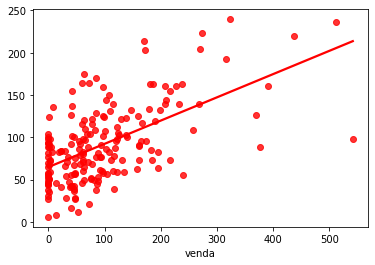

In [ ]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red')